In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('D:/Data Science/Data-Science-main/pmf.csv')

In [5]:
df.head()

,AREA,RAINFALL,AVG_TEMPERATURE,HUMIDITY,GROUND_WATERLEVEL,PRODUCTION
0,108608,8.18,24.1,64.0,4.71,376544
1,141154,166.00,26.4,74.3,5.86,429108
2,103207,10.98,24.1,60.1,6.07,332223
3,133365,137.04,28.0,73.0,5.67,345015
4,48545,7.30,24.6,64.0,6.47,152965


In [6]:
print(df.dtypes)

AREA                   int64
RAINFALL             float64
AVG_TEMPERATURE      float64
HUMIDITY             float64
GROUND_WATERLEVEL    float64
PRODUCTION             int64
dtype: object


In [7]:
df['AREA'] = df['AREA'].astype(float) 
df['PRODUCTION'] = df['PRODUCTION'].astype(float) 
  
print()

In [8]:
print(df.dtypes)

AREA                 float64
RAINFALL             float64
AVG_TEMPERATURE      float64
HUMIDITY             float64
GROUND_WATERLEVEL    float64
PRODUCTION           float64
dtype: object


In [9]:
df

,AREA,RAINFALL,AVG_TEMPERATURE,HUMIDITY,GROUND_WATERLEVEL,PRODUCTION
0,108608.0,8.18,24.1,64.0,4.710,376544.0
1,141154.0,166.00,26.4,74.3,5.860,429108.0
2,103207.0,10.98,24.1,60.1,6.070,332223.0
3,133365.0,137.04,28.0,73.0,5.670,345015.0
4,48545.0,7.30,24.6,64.0,6.470,152965.0
5,122858.0,179.24,29.4,71.0,6.100,395726.0
6,64718.0,14.85,23.9,62.1,6.630,206321.0
7,65453.0,107.94,27.9,69.6,8.330,147989.0
8,18182.0,14.85,23.8,65.2,10.140,50382.0
9,146979.0,204.94,26.3,72.5,8.860,501639.0


In [10]:
X = df.values
print(X.shape)
print(X)

(23, 6)
[[1.08608e+05 8.18000e+00 2.41000e+01 6.40000e+01 4.71000e+00 3.76544e+05]
 [1.41154e+05 1.66000e+02 2.64000e+01 7.43000e+01 5.86000e+00 4.29108e+05]
 [1.03207e+05 1.09800e+01 2.41000e+01 6.01000e+01 6.07000e+00 3.32223e+05]
 [1.33365e+05 1.37040e+02 2.80000e+01 7.30000e+01 5.67000e+00 3.45015e+05]
 [4.85450e+04 7.30000e+00 2.46000e+01 6.40000e+01 6.47000e+00 1.52965e+05]
 [1.22858e+05 1.79240e+02 2.94000e+01 7.10000e+01 6.10000e+00 3.95726e+05]
 [6.47180e+04 1.48500e+01 2.39000e+01 6.21000e+01 6.63000e+00 2.06321e+05]
 [6.54530e+04 1.07940e+02 2.79000e+01 6.96000e+01 8.33000e+00 1.47989e+05]
 [1.81820e+04 1.48500e+01 2.38000e+01 6.52000e+01 1.01400e+01 5.03820e+04]
 [1.46979e+05 2.04940e+02 2.63000e+01 7.25000e+01 8.86000e+00 5.01639e+05]
 [1.19417e+05 1.36800e+01 2.48000e+01 5.98000e+01 5.96000e+00 4.10675e+05]
 [1.66750e+05 1.78160e+02 2.71000e+01 7.40000e+01 5.13000e+00 5.21094e+05]
 [1.66759e+05 7.94000e+00 2.41000e+01 6.38000e+01 4.42000e+00 5.48470e+05]
 [1.30000e+05 1.6

In [11]:
print(type(X))

<class 'numpy.ndarray'>


In [12]:
y = X[:,-1]
X = X[:,:5]

In [13]:

print(X.shape)
print(y.shape)
print(X)
print(y)

(23, 5)
(23,)
[[1.08608e+05 8.18000e+00 2.41000e+01 6.40000e+01 4.71000e+00]
 [1.41154e+05 1.66000e+02 2.64000e+01 7.43000e+01 5.86000e+00]
 [1.03207e+05 1.09800e+01 2.41000e+01 6.01000e+01 6.07000e+00]
 [1.33365e+05 1.37040e+02 2.80000e+01 7.30000e+01 5.67000e+00]
 [4.85450e+04 7.30000e+00 2.46000e+01 6.40000e+01 6.47000e+00]
 [1.22858e+05 1.79240e+02 2.94000e+01 7.10000e+01 6.10000e+00]
 [6.47180e+04 1.48500e+01 2.39000e+01 6.21000e+01 6.63000e+00]
 [6.54530e+04 1.07940e+02 2.79000e+01 6.96000e+01 8.33000e+00]
 [1.81820e+04 1.48500e+01 2.38000e+01 6.52000e+01 1.01400e+01]
 [1.46979e+05 2.04940e+02 2.63000e+01 7.25000e+01 8.86000e+00]
 [1.19417e+05 1.36800e+01 2.48000e+01 5.98000e+01 5.96000e+00]
 [1.66750e+05 1.78160e+02 2.71000e+01 7.40000e+01 5.13000e+00]
 [1.66759e+05 7.94000e+00 2.41000e+01 6.38000e+01 4.42000e+00]
 [1.30000e+05 1.64180e+02 2.63000e+01 7.12000e+01 2.45000e+00]
 [1.52000e+05 2.82800e+01 2.45000e+01 6.43000e+01 2.70000e+00]
 [1.60406e+05 1.75800e+02 2.60000e+01 7.1

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(18, 5)
(5, 5)
(18,)
(5,)


In [15]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [24]:
y_pred = regressor.predict(X_test)
print(y_pred)
print(y_test)

[521094. 521094. 332223. 206321. 239209.]
[543135. 501639. 376544.  50382. 274182.]


In [25]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df
print(y_pred.shape)
print(y_test.shape)

(5,)
(5,)


[Text(184.14000000000001, 201.90857142857143, 'X[0] <= 146577.0\nmse = 30127336246.127\nsamples = 18\nvalue = 434420.389'),
 Text(80.352, 170.84571428571428, 'X[0] <= 90323.0\nmse = 11722028105.09\nsamples = 10\nvalue = 310023.1'),
 Text(26.784000000000002, 139.78285714285715, 'X[4] <= 5.225\nmse = 1444686376.0\nsamples = 4\nvalue = 186621.0'),
 Text(13.392000000000001, 108.72, 'mse = 0.0\nsamples = 1\nvalue = 239209.0'),
 Text(40.176, 108.72, 'X[2] <= 24.25\nmse = 697138392.889\nsamples = 3\nvalue = 169091.667'),
 Text(26.784000000000002, 77.65714285714284, 'mse = 0.0\nsamples = 1\nvalue = 206321.0'),
 Text(53.568000000000005, 77.65714285714284, 'X[4] <= 7.4\nmse = 6190144.0\nsamples = 2\nvalue = 150477.0'),
 Text(40.176, 46.59428571428572, 'mse = 0.0\nsamples = 1\nvalue = 152965.0'),
 Text(66.96000000000001, 46.59428571428572, 'mse = 0.0\nsamples = 1\nvalue = 147989.0'),
 Text(133.92000000000002, 139.78285714285715, 'X[1] <= 150.61\nmse = 1653502275.139\nsamples = 6\nvalue = 392291.1

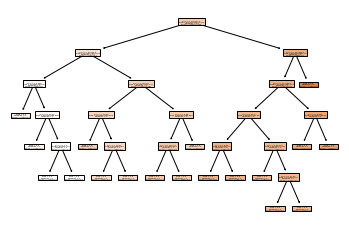

In [28]:
tree.plot_tree(regressor,filled=True)

In [31]:
from sklearn.metrics import r2_score,mean_squared_error
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
r_squared=r2_score(y_test,y_pred)
print(mse,rmse,r_squared)

Mean Absolute Error: 55345.8
Mean Squared Error: 5673747239.4
Root Mean Squared Error: 75324.28054352726
5673747239.4 75324.28054352726 0.8187486760497109
